# USE OF LINEAR REGRESSION TO PREDICT APPLIANCES ENERGY CONSUMPTION IN A LOW ENERGY BUILDING

In this project, we will employ the machine learning technique in order to predict the amount of energy used by appliaces in a low energy building.
We are given a .csv file (source: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) which contains the dataset at 10 minutes for more or less 5 month: from January to May. Toghether with the energy consumption, we find several data, mainly reguarding internal and external climate features. Those are the following:

- energy use of appliances [Wh]
- energy use of light fixtures in the house [Wh] 
- T1, Temperature in kitchen area[°C]
- RH_1, Humidity in kitchen area [%] 
- T2, Temperature in living room area [°C]
- RH_2, Humidity in living room area [%]
- T3, Temperature in laundry room area [°C]
- RH_3, Humidity in laundry room area [%] 
- T4, Temperature in office room [°C]
- RH_4, Humidity in office room [%]
- T5, Temperature in bathroom [°C]
- RH_5, Humidity in bathroom [%]
- T6, Temperature outside the building (north side) [°C]
- RH_6, Humidity outside the building (north side) [%] 
- T7, Temperature in ironing room [°C]
- RH_7, Humidity in ironing room [%] 
- T8, Temperature in teenager room 2 [°C]
- RH_8, Humidity in teenager room 2 [%] 
- T9, Temperature in parents room [°C]
- RH_9, Humidity in parents room [%]  
- To, Temperature outside (from a near weather station) [°C]
- Pressure (from a near weather station) [mm Hg] 
- RH_out, Humidity outside (from a near weather station) [%]  
- Wind speed (from a near weather station) [m/s] 
- Visibility (from a near weather station) [km]
- Tdewpoint (from a near weather station) [°C]
- rv1, Random variable 1 [nondimensional]
- rv2, Random variable 2 [nondimensional] 

Our aim is to find a correlation between some of those features and energy consumption. 

First of all, then, we create a dataframe


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#First of all, we create the path for the file containing the data we need. Once done, we convert it into a Data Frame
DataFolderPath="/Users/tomassanchez/Desktop"
DataFileName = "energydata_complete.csv"
DataFilePath= DataFolderPath+"/"+DataFileName
DF_data = pd.read_csv(DataFilePath,sep=",",index_col=0)
previousIndex= DF_data.index
NewparsedIndex = pd.to_datetime(previousIndex)
DF_data.index= NewparsedIndex

the data frame is big, and it considers a period of one year. We could just take into account a shorter period

In [6]:
DF_period = DF_data["2016-02-10 00:00:00":"2016-02-15 00:00:00"]
DF_data.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


We can plot the energy consumption over a specific period (from 00 am of the 10th of February to 12 pm of the 14th of February) in order to get an idea of its profile:

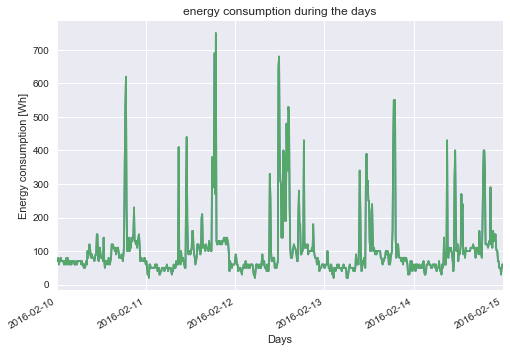

In [7]:
DF_appliance=DF_period['Appliances']
DF_appliance.head(5)
DF_appliance.describe() 
plt.figure()
plt.plot(DF_appliance)
DF_appliance.plot()
plt.xlabel('Days')
plt.ylabel('Energy consumption [Wh]')
plt.title("energy consumption during the days")
plt.show()

Obviously, it is unlikely that all the data are suitable to find a correlation. First of all, then, we have to find suitable features, that will be later employed to predict the energy consumption.
We can see that there exists features that follow the consumption profile (for example, T_out. We can imagine that during the day, that is when temperatures are higher, our building has people inside it who use electrical devices. Also "lights" could be chosen, as they directly affect the energy consumption amount). Other features' profile, on the other hand, will be less similar: those features are probably not closely related to the consumption. The column RH_3 (that is the humidity in laundry) can be taken as example.

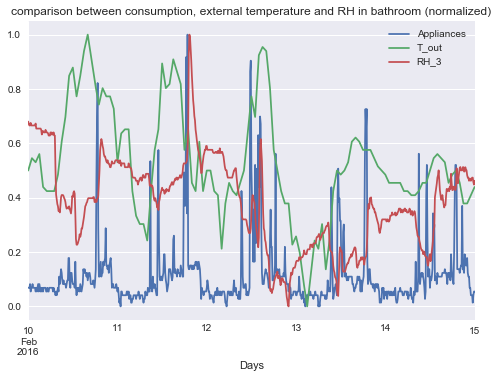

In [8]:
DF_appliance=DF_period['Appliances'].to_frame()
DF_T_out=DF_period['T_out'].to_frame()
DF_rh=DF_period['RH_3'].to_frame()
DFgraph=DF_appliance.join(DF_T_out)
DFgraph=DFgraph.join(DF_rh)
df_chosen_dates_normalized = (DFgraph- DFgraph.min())/(DFgraph.max()-DFgraph.min())
plt.figure()
df_chosen_dates_normalized.plot()
plt.title("comparison between consumption, external temperature and RH in bathroom (normalized)")
plt.xlabel('Days')
plt.show()

This graph is a bit chaotic, so we will plot only energy consumption and external temperature, in the same graph but with different scales:

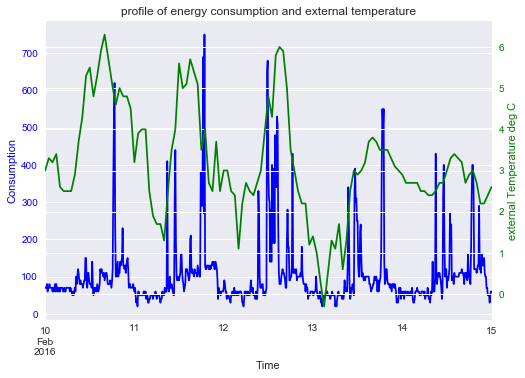

In [9]:
DFgraph=DFgraph.drop('RH_3',1)
plt.figure("profile of energy consumption and external temperature")
fig = plt.figure()
ax1 = fig.add_subplot(111) # axis for consumption
ax2 = ax1.twinx()          # axis for T_out
consum_col='Appliances'
DFgraph.plot(ax=ax1, y=consum_col, legend=False,color='b')
ax1.set_ylabel('Consumption',color='b')
ax1.tick_params(axis='y', colors='b')
DFgraph.plot(ax=ax2, y='T_out', legend=False, color='g')
ax2.set_ylabel('external Temperature deg C',color='g')
ax2.tick_params(axis='y',colors='g')
ax1.set_xlabel('Time')
plt.title("profile of energy consumption and external temperature")
plt.show()

What we see is that the overall profile of the temperature can be asociated with the one of consumption, in fact the former's peaks coincide with the consumnption's peak. Obviously, they do no match perfectly, but we can notice that are similar

Now, by means of the appropriate command, we will search correlation between column of our data frame. The command .corr() will compare the columns to each other and, as output, will give us a data frame containing values from -1 to 1, that is nothing but a correlation rate: the closer to 1 is the value, the stronger is the correlation. We can plot the result to see the spread of the value. Since we are interested in appliances, we hope that the values of our output datarame contained in the column called "appliances" will be high. 

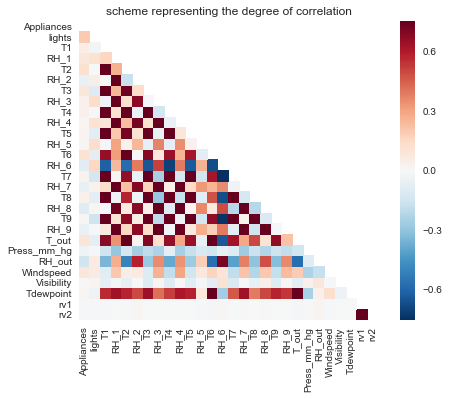

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.0,0.197278,0.055447,0.086031,0.120073,-0.060465,0.08506,0.036292,0.040281,0.016965,...,0.01001,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.00023,0.015353,-0.011145,-0.011145


In [10]:
df_correlation = DF_data.corr()
fig = plt.figure()
mask = np.zeros_like(df_correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df_correlation, mask=mask, vmax=.3, square=True,annot=False, fmt="d")
plt.title("scheme representing the degree of correlation")
plt.show()
ax.xaxis.tick_bottom() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
df_correlation.head(1)

We see that there are high values of correlation between temperatures and relative humidity, but unfortunatelly, in the first column, that is that is what we are interested in, the values are low.
We need to cream off those values and consider the highest ones (that are quite low anyway). Therefore firstly we will consider only the column related with Appliances, then we will take into account only the higher than 0.05. "nicefeatures" is a series that contains the features whose rate of correlation is higher than the lower bound we imposed

In [11]:
df_schifo=df_correlation['Appliances']>0.05
df_schifo=df_schifo[df_schifo]
nicefeatures= df_schifo.index.tolist()
nicefeatures.pop(0)
print("how many nice fetures do we have? ")+str(len(nicefeatures))

how many nice fetures do we have? 8


They amount of features is low, therefore we will try to find other suitable features by means of the following functions. They do the same, that is shifting of a number that we can decide the values of a specific column. What we do here, then, is to shift of 10 the column of the suitable variables we found previously, cotained in "nicefeatures". Then we will look for other correlations and extract a series with the new suitable series

In [12]:
pd.options.mode.chained_assignment = None 
DFF=DF_period
DF_period=DFF.copy()
def lag_column(df,column_names,lag_period=1):
    for column_name in column_names:
        column_name = [str(column_name)]
        for i in np.arange(1,lag_period+1,1):
            new_column_name = [col +'_'+str(i) for col in column_name]
            df[new_column_name]=(df[column_name]).shift(i)
    return df
    
def lagcolumn(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i)+"0 min"
        df[new_column_name]=df[column_name].shift(i)
    return df
 
lag_column(DFF, nicefeatures,10)
DFF=DFF.dropna()
df_correlation_bis = DFF.corr()
df_schifo_bis=df_correlation_bis['Appliances']>0.05
df_schifo_bis=df_schifo_bis[df_schifo_bis]
verynicefeatures= df_schifo_bis.index.tolist()
print ("our very nice features are: ")+str(verynicefeatures)

our very nice features are: ['Appliances', 'lights', 'RH_1', 'T6', 'T8', 'T_out', 'Windspeed', 'Visibility', 'lights_1', 'lights_2', 'lights_3', 'lights_4', 'lights_5', 'T6_1', 'T6_2', 'T6_3', 'T6_4', 'T6_5', 'T6_6', 'T6_7', 'T6_8', 'T6_9', 'T6_10', 'T_out_1', 'T_out_2', 'T_out_3', 'T_out_4', 'T_out_5', 'T_out_6', 'T_out_7', 'T_out_8', 'T_out_9', 'T_out_10', 'Windspeed_1', 'Windspeed_2', 'Windspeed_3', 'Windspeed_4', 'Windspeed_5', 'Windspeed_6', 'Windspeed_7', 'Windspeed_8', 'Windspeed_9', 'Windspeed_10']


let's now create a data frame with the  following following columns:

- appliances and shifted appliances
- lights and lagged lights
- RH_1 and lagged RH_1
- T6 and lagged T6
- T8
- T_out and lagged T_out
- windspeed and lagged windspeed
- Visibility

We also drop all the "Nan", since they are useless, and prit the column names of the obtained dataframe to see if it is correct.

In [13]:
DFAppl=lagcolumn(DF_data[['Appliances']],'Appliances',24)
DFlights=lagcolumn(DF_data[['lights']],'lights',6)
DFRH1=lagcolumn(DF_data[['RH_1']],'RH_1',2)
DFT6=lagcolumn(DF_data[['T6']],'T6',2)
DFT_out=lagcolumn(DF_data[['T_out']],'T_out',2)
DFwind=lagcolumn(DF_data[['Windspeed']],'Windspeed',2)
DFtotal=lagcolumn(DF_data[['Appliances']],'Appliances',24).join([lagcolumn(DF_data[['lights']],'lights',6)])
DFtotal=DFtotal.join(DFRH1)
DFtotal=DFtotal.join(DFT6)
DFtotal=DFtotal.join(DF_data[['T8']])
DFtotal=DFtotal.join(DFT_out)
DFtotal=DFtotal.join(DFwind)
DF_total=DFtotal.join(DF_data[['Visibility']])
DF_total.dropna(inplace=True)
DF_target = DF_total[["Appliances"]]
DF_features = DF_total.drop("Appliances",axis=1)
print ("DF index: ")+str(list(DF_features ))

DF index: ['Appliances-10 min', 'Appliances-20 min', 'Appliances-30 min', 'Appliances-40 min', 'Appliances-50 min', 'Appliances-60 min', 'Appliances-70 min', 'Appliances-80 min', 'Appliances-90 min', 'Appliances-100 min', 'Appliances-110 min', 'Appliances-120 min', 'Appliances-130 min', 'Appliances-140 min', 'Appliances-150 min', 'Appliances-160 min', 'Appliances-170 min', 'Appliances-180 min', 'Appliances-190 min', 'Appliances-200 min', 'Appliances-210 min', 'Appliances-220 min', 'Appliances-230 min', 'Appliances-240 min', 'lights', 'lights-10 min', 'lights-20 min', 'lights-30 min', 'lights-40 min', 'lights-50 min', 'lights-60 min', 'RH_1', 'RH_1-10 min', 'RH_1-20 min', 'T6', 'T6-10 min', 'T6-20 min', 'T8', 'T_out', 'T_out-10 min', 'T_out-20 min', 'Windspeed', 'Windspeed-10 min', 'Windspeed-20 min', 'Visibility']


Luckily, it is.

It is now time to create a training dataset for machine learning and provide an independent testset which follows same probabilistic distribution of training.
The sklearn.model_selection module contains a machine learning algorithm which enable us to implement the linear regression method.
We will plot the real value of consumption and the predicted one in order to make a comparison.

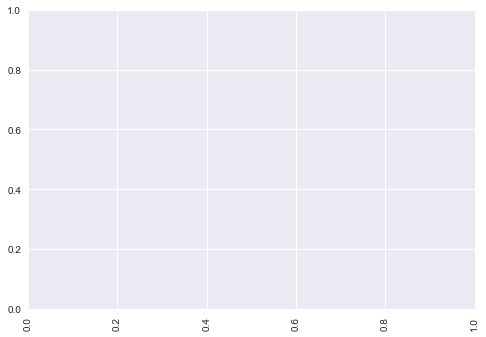

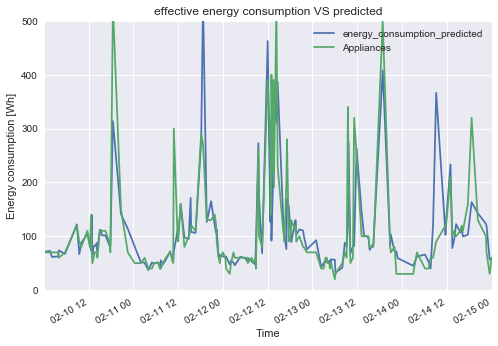

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size=0.2, random_state=41234)
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
predict = linear_reg.predict(X_test)
predictions = pd.Series(predict.ravel(),index=y_test.index).rename("energy_consumption"+"_predicted")
predictions_frame = pd.DataFrame(predictions).join(y_test).dropna()
plt.figure()
predictions_frame["2016-02-10 00:00:00":"2016-02-15 00:00:00"].plot()
plt.xlabel('Time')
plt.ylabel('Energy consumption [Wh]')
plt.title("effective energy consumption VS predicted")
plt.ylim([0,500])
plt.show()

We see that our prediction, although it does not match perfectly, follows the consumption profile: the peak of consuption are quite well predicted.
There exist parameters that can objectively evaluate the quality of our predictions. Those are:

- The R2 score, that expresses how much our model fit the given values, and acquires a value between 0 and 1. 1 means that our predictions perfectly match consumption, good estimates are obtained with values around 0.6
- mean absolute error points out the dispersion of the data around the regression line
- mean squared error is another way to express the dispersion

We are going to calculate them.

In [15]:
class accuracy_metrics:
    def coeff_var(self,df,actual_col,predicted_col):
        y_actual_mean = df[actual_col].mean()
        mse = mean_squared_error(df[actual_col],df[predicted_col])
        return np.sqrt(mse)/y_actual_mean
    def mean_bias_err(self,df,actual_col,predicted_col):
        y_actual_mean = df[actual_col].mean()
        return mean_absolute_error(df[actual_col],df[predicted_col])/y_actual_mean
    def r2_score(self,df,actual_col,predicted_col):
        return r2_score(df[actual_col],df[predicted_col])
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error_linearREG=mean_squared_error(y_test,predict)
mean_absolute_error_linearREG=mean_absolute_error(y_test,predict)
R2_score_linearReg= r2_score(y_test,predict)
print "Mean squared error is " + str(mean_squared_error_linearREG)
print "Mean absoulute error is " + str(mean_absolute_error_linearREG)
print "R2 score is " + str(R2_score_linearReg)

Mean squared error is 4070.66086697
Mean absoulute error is 29.9661935732
R2 score is 0.574896133234


In order to check if, even though our accuracy metrics values are not that high, our prediction is plausible, we create a scatter plot. What we see is that the line that represents  our prediction is contained into the region identified by the points.

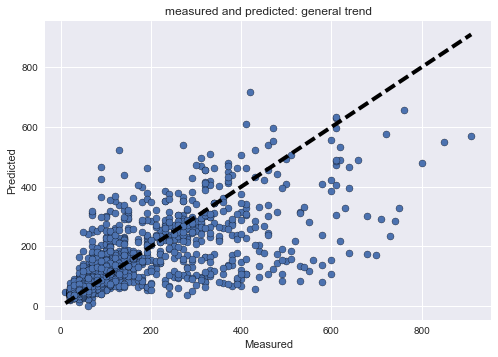

In [16]:
fig, ax = plt.subplots()
ax.scatter(predictions_frame['Appliances'], predictions_frame['energy_consumption_predicted'], edgecolors=(0, 0, 0))
ax.plot([predictions_frame['Appliances'].min(), predictions_frame['Appliances'].max()], [predictions_frame['Appliances'].min(), predictions_frame['Appliances'].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("measured and predicted: general trend")
plt.show()

Now: Our R2 score is not that high, and also the errors' values are quite high.
In order to evaluate the quality of the model we developed, we employ the cross-validation approach.
The function we call (cross_val_predict) generate cross-validated estimates for each input data point.

In [17]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_linearReg_CV=pd.DataFrame(predict_linearReg_CV, index = DF_target.index,columns=["prediction with CV"])
predict_linearReg_CV = predict_linearReg_CV.join(DF_target)
predict_linearReg_CV_period=predict_linearReg_CV["2016-02-10 00:00:00":"2016-02-15 00:00:00"]

cross_val_predict returns an array of the same size as `DF_features` where each entry is a prediction obtained by cross validation. We can plot a scatter plot  that enables us to compare the measured values and the estimated trend.
(source: http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py)

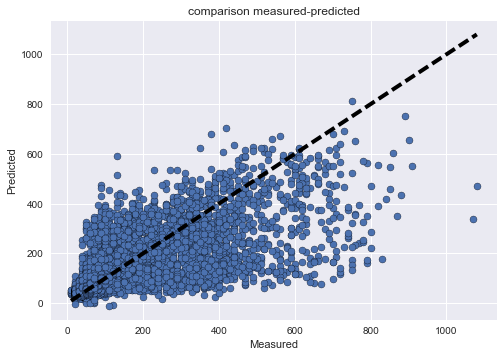

Mean squared error is 4277.92062802
Mean absoulute error is 30.3830086675
R2 score is 0.592684051248


In [18]:
target=predict_linearReg_CV['Appliances']
estimated=predict_linearReg_CV['prediction with CV']
fig, ax = plt.subplots()
ax.scatter(target, estimated, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("comparison measured-predicted")
plt.show()
#We calculate again the values
mean_squared_errorCV=mean_squared_error(DF_target,estimated)
mean_absolute_errorCV=mean_absolute_error(DF_target,estimated)
R2_scoreCV= r2_score(DF_target,estimated)
print "Mean squared error is " + str(mean_squared_errorCV)
print "Mean absoulute error is " + str(mean_absolute_errorCV)
print "R2 score is " + str(R2_scoreCV)

We print the difference with the accuracy metrics values og linear regression. Are those values better?

In [19]:
print "Mean squared error difference " + str(mean_squared_errorCV-mean_squared_error_linearREG)
print "Mean absoulute error difference " + str(mean_absolute_errorCV-mean_absolute_error_linearREG)
print "R2 score difference " + str(R2_scoreCV-R2_score_linearReg)

Mean squared error difference 207.259761046
Mean absoulute error difference 0.416815094278
R2 score difference 0.0177879180139


We see that we lost some accuracy.

Now we implement the Random Forest Regressor.

/Users/tomassanchez/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


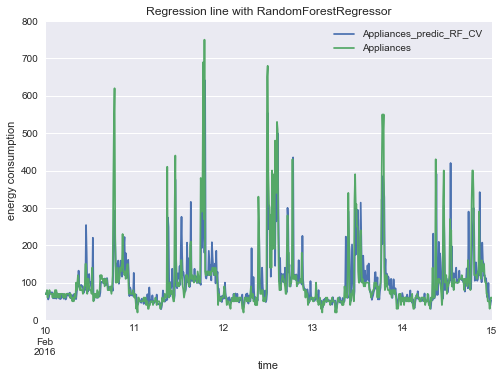

Mean squared error is 4661.4576125
Mean absoulute error is 33.047384709
R2 score is 0.556166138856

Mean squared error difference 590.79674553
Mean absoulute error difference 3.08119113586
R2 score difference -0.0187299943787


In [20]:
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor()
predict = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predictions = pd.Series(predict,index=DF_target.index).rename('Appliances_predic_RF_CV')
predictions_frame = pd.DataFrame(predictions).join(DF_target).dropna()
predicted_period=predictions_frame["2016-02-10 00:00:00":"2016-02-15 00:00:00"]
predicted_period.plot()
plt.xlabel("time")
plt.ylabel("energy consumption")
plt.ylim([0,800])
plt.title("Regression line with RandomForestRegressor")
plt.show()
meansquare_RF=mean_squared_error(DF_target,predict)
meanabs_error_RF=mean_absolute_error(DF_target,predict)
R2score_RF= r2_score(DF_target,predict)
print "Mean squared error is " + str(meansquare_RF)
print "Mean absoulute error is " + str(meanabs_error_RF)
print "R2 score is " + str(R2score_RF)
print ""
print "Mean squared error difference " + str(meansquare_RF-mean_squared_error_linearREG)
print "Mean absoulute error difference " + str(meanabs_error_RF-mean_absolute_error_linearREG)
print "R2 score difference " + str(R2score_RF-R2_score_linearReg)

One more time, we lost some accuracy.

Let's try to sum up what we have done until now. Basically, we created our dataframe that contained all the data and found some features that allowed us to establish a correlation with the energy consumption. The main problem is that we had just a few feasible features, so we tried to shift the values of some of our features, in order to find some greater correlation rate. We chose only the values greater than 0.05. What if we increase this minimum value and include in DF_total only those specific features? We expect less features to calculate the correlation with but with highest rates, that is, a better correlation.
Once created again DF_total, the commands are identical to the previous part.

In [21]:
df_schifo_bis=df_correlation_bis['Appliances']>0.15
df_schifo_bis=df_schifo_bis[df_schifo_bis]
verynicefeatures= df_schifo_bis.index.tolist()
print verynicefeatures
#We insert the column of the lights shifted of 2, the columns T_6 and T_out

DFAppl=lagcolumn(DF_data[['Appliances']],'Appliances',10)
DFtotal=DFAppl.join([lagcolumn(DF_data[['lights']],'lights',3)])
DFtotal=DFtotal.join(DFT6)
DFtotal=DFtotal.join(DFT_out)
DFtotal.dropna(inplace=True)
DFtarget = DFtotal[["Appliances"]]
DFfeatures = DFtotal.drop("Appliances",axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DFfeatures, DFtarget, test_size=0.2, random_state=41234)

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train, y_train)
predict = linear_reg.predict(X_test)
predictions = pd.Series(predict.ravel(),index=y_test.index).rename("energy_consumption"+"_predicted")
predictions_frame = pd.DataFrame(predictions).join(y_test).dropna()
predictions_frame["2016-02-10 00:00:00":"2016-02-15 00:00:00"].plot()
plt.xlabel('Days')
plt.ylabel('Energy consumption [Wh]')
plt.title("energy consumption during the days")
plt.ylim([0,500])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error_linearREG_2=mean_squared_error(y_test,predict)
mean_absolute_error_linearREG_2=mean_absolute_error(y_test,predict)
R2_score_linearReg_2= r2_score(y_test,predict)
print "Mean squared error is " + str(mean_squared_error_linearREG_2)
print "Mean absoulute error is " + str(mean_absolute_error_linearREG_2)
print "R2 score is " + str(R2_score_linearReg_2)
print " "
print "the Mean squared error difference is " + str(mean_squared_error_linearREG_2-mean_squared_error_linearREG)
print "Mean absoulute error is " + str(mean_absolute_error_linearREG_2-mean_absolute_error_linearREG)
print "R2 score is " + str(R2_score_linearReg_2-R2_score_linearReg)

['Appliances', 'lights', 'T6', 'T_out', 'lights_1', 'lights_2', 'lights_3', 'T6_1', 'T6_2', 'T6_3', 'T6_4', 'T6_5', 'T6_6', 'T6_7', 'T6_8', 'T6_9', 'T6_10', 'T_out_1', 'T_out_2', 'T_out_3', 'T_out_4', 'T_out_5', 'T_out_6', 'T_out_7', 'T_out_8', 'T_out_9', 'T_out_10']
Mean squared error is 3963.32252348
Mean absoulute error is 28.8734972947
R2 score is 0.606730031839
 
the Mean squared error difference is -107.338343486
Mean absoulute error is -1.09269627851
R2 score is 0.0318338986042


We can notice that R2 score is slightly increased, meaning a better prediction.